In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pickle

In [2]:
jogo_n = "1"

In [3]:
with open(f"Blender Imgs/Dcs/{jogo_n}.pkl", "rb")as f:
    dc = pickle.load(f)

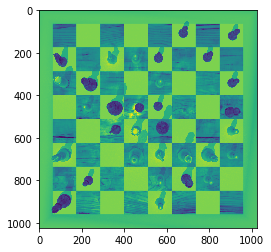

In [4]:
img = cv2.imread(f"Blender Imgs/Boards/{jogo_n}.png", 0)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#cv2.circle(img, (29, 29), 20, 0, thickness = -1)
plt.imshow(img)

In [5]:
def get_squares(img, pts1, i, j, square):
    origem = np.array(pts1[0])
    tr = np.array(pts1[1])
    bl = np.array(pts1[3])
    br = np.array(pts1[2])
    
    #print(origem, tr, ((br - origem) // 16))
     
    
    centro = (origem + ((tr - origem) * i // 8) + ((bl - origem) * j // 8) + ((br - origem) // 16)).astype(int)
    #print(centro)
    return img[centro[1] - square : centro[1] + square, centro[0] - square : centro[0] + square]

In [6]:
aux = np.zeros((400, 400), dtype = np.float32)
pts_aux = np.float32([[0,0],[aux.shape[1], 0],[aux.shape[1],aux.shape[0]],[0,aux.shape[0]]])
#pts_aux = np.float32([[int(0.1 * aux.shape[1]),int(0.1 * aux.shape[0])],[int(0.9*aux.shape[1]), int(0.1 * aux.shape[0])],[int(0.9*aux.shape[1]),int(0.9*aux.shape[0])],[int(0.1 * aux.shape[1]), int(0.9*aux.shape[0])]])
img_r = cv2.resize(img, (int(img.shape[1]/2), int(img.shape[0]/2)))

In [7]:
# points = []
# ix,iy = -1,-1

# def get_points(event,x,y,flags,param):
#     global ix,iy,drawing,mode, points

#     if event == cv2.EVENT_LBUTTONDOWN:
#         ix,iy = x,y
#         #print(x, y)
#         points.append([x, y])

# img_r = cv2.resize(img, (int(img.shape[1]/2), int(img.shape[0]/2)))

# #descomentar abaixo para clicar na tela

# cv2.imshow("click", img_r)
# cv2.setMouseCallback('click', get_points)

# while (1):
#     k = cv2.waitKey(1) & 0xFF
#     if k == ord('q') or k == 27:
#         break
        
# cv2.destroyAllWindows()


# pts1 = np.float32(points[:4])

In [8]:
# pts1

In [9]:
a, b = 29, 481
pts1 = np.array([[a, a], [b, a], [b, b], [a, b]], dtype = np.float32)

In [10]:
M = cv2.getPerspectiveTransform(pts1, pts_aux)
perspectiva = cv2.warpPerspective(img_r, M,(aux.shape[1], aux.shape[0]), aux, borderMode = cv2.BORDER_TRANSPARENT)

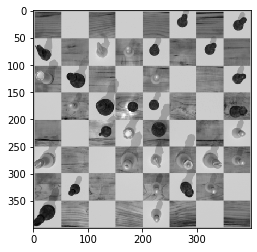

In [11]:
plt.imshow(perspectiva, cmap = "gray")

In [12]:
perspectiva.shape

(400, 400)

In [13]:
lst = []

for i in range(8):
    for j in range(8):
        lst.append(perspectiva[perspectiva.shape[1]*i//8:perspectiva.shape[1]*(i+1)//8, perspectiva.shape[0]*j//8:perspectiva.shape[0]*(j+1)//8])

array = np.array(lst).reshape(8, 8, 50,  -1)

In [14]:
def center_image(img, p = 0.35, boolean = True):
    if boolean == False:
        return img
    w, h = img.shape
    cw, ch = w//2, h//2
    #p = 0.4 #max 0.5
    return img[int(cw - w*p): int(cw + w*p), int(ch - h*p) : int(ch + h*p)]


def show_full_board(array_geral, center = False, p = 0.35):
    fig, axs = plt.subplots(8, 8, figsize = (10, 10))
    [axi.set_axis_off() for axi in axs.ravel()]
    for i in range(8):
        for j in range(8):
            axs[i, j].imshow(center_image(array_geral[i, j], boolean = center, p = p))
            #axs[i, j].imshow(get_squares(img_r, pts1, i, j, 35))
    return

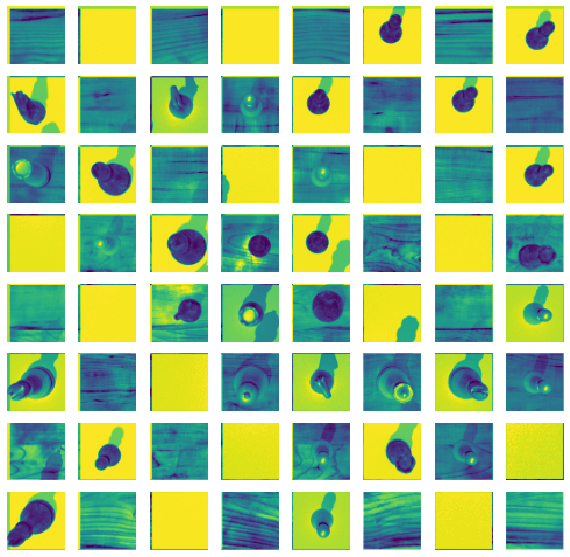

In [15]:
show_full_board(array)

In [16]:
dc

{'B0': array([5, 0]),
 'B1': array([5, 6]),
 'K0': array([5, 3]),
 'N0': array([1, 2]),
 'N1': array([5, 4]),
 'P0': array([1, 3]),
 'P1': array([2, 4]),
 'P2': array([3, 1]),
 'P3': array([4, 7]),
 'P4': array([5, 7]),
 'P5': array([6, 4]),
 'P6': array([6, 6]),
 'P7': array([7, 4]),
 'Q0': array([5, 5]),
 'R0': array([2, 0]),
 'R1': array([4, 3]),
 '_0': array([0, 0]),
 '_1': array([0, 1]),
 '_2': array([0, 2]),
 '_3': array([0, 3]),
 '_4': array([0, 4]),
 '_5': array([0, 6]),
 '_6': array([1, 1]),
 '_7': array([1, 5]),
 '_8': array([1, 7]),
 '_9': array([2, 2]),
 '_10': array([2, 3]),
 '_11': array([2, 5]),
 '_12': array([2, 6]),
 '_13': array([3, 0]),
 '_14': array([3, 5]),
 '_15': array([3, 6]),
 '_16': array([4, 0]),
 '_17': array([4, 1]),
 '_18': array([4, 5]),
 '_19': array([4, 6]),
 '_20': array([5, 1]),
 '_21': array([5, 2]),
 '_22': array([6, 0]),
 '_23': array([6, 2]),
 '_24': array([6, 3]),
 '_25': array([6, 7]),
 '_26': array([7, 1]),
 '_27': array([7, 2]),
 '_28': array(

In [17]:
for peca, pos in dc.items():
    if peca[0] != "_":
        print(peca)
        img = array[pos[0], pos[1]]
        #plt.imshow(img)
        #plt.show()
        #cv2.imwrite(f"LabelsBlender/{peca[0]}/{jogo_n}_{peca}.png", img)

B0
B1
K0
N0
N1
P0
P1
P2
P3
P4
P5
P6
P7
Q0
R0
R1
b0
b1
k0
n0
n1
p0
p1
p2
p3
p4
p5
p6
p7
q0
r0
r1


In [18]:
%%time
for i in range(1, 570 + 1):
    
    jogo_n = str(i)
    
    with open(f"Blender Imgs/Dcs/{jogo_n}.pkl", "rb")as f:
        dc = pickle.load(f)
    img = cv2.imread(f"Blender Imgs/Boards/{jogo_n}.png", 0)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #plt.imshow(img)
    #plt.show()
    
    aux = np.zeros((400, 400), dtype = np.float32)
    pts_aux = np.float32([[0,0],[aux.shape[1], 0],[aux.shape[1],aux.shape[0]],[0,aux.shape[0]]])
    img_r = cv2.resize(img, (int(img.shape[1]/2), int(img.shape[0]/2)))
    
    a, b = 29, 481
    pts1 = np.array([[a, a], [b, a], [b, b], [a, b]], dtype = np.float32)
    
    M = cv2.getPerspectiveTransform(pts1, pts_aux)
    perspectiva = cv2.warpPerspective(img_r, M,(aux.shape[1], aux.shape[0]), aux, borderMode = cv2.BORDER_TRANSPARENT)
    
    #plt.imshow(perspectiva, cmap = "gray")
    #plt.show()
    
    
    lst = []
    for i in range(8):
        for j in range(8):
            lst.append(perspectiva[perspectiva.shape[1]*i//8:perspectiva.shape[1]*(i+1)//8, perspectiva.shape[0]*j//8:perspectiva.shape[0]*(j+1)//8])

    array = np.array(lst).reshape(8, 8, 50,  -1)
    
    for peca, pos in dc.items():
        if peca[0] != "_" or True: # or True para acrescentar labels de _
            #print(peca)
            img = array[pos[0], pos[1]]
            #plt.imshow(img)
            #plt.show()
            cv2.imwrite(f"Blender Labels/{peca[0]}/{jogo_n}_{peca}.png", img)

CPU times: user 24 s, sys: 1.6 s, total: 25.6 s
Wall time: 30.9 s
